# Data Audit Report

This is the first part of our Competition 2 where we performed our preprocessing steps on the data. More details can be found in our [README.MD](README.md) file.

### Importing Our Required Packages and things

In [1]:
#importing required libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backend as bk
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from pandas import ExcelWriter

#set plot style to 'ggplot' and don't limit the view of DF when diaplyhign them to screen
plt.style.use('ggplot')
pd.options.display.max_columns = None

### Read the Data In

In [2]:
#importing our data and resetting our index
df = pd.read_excel('Data/Comp2_Raw_Data.xls')
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


### Renaming and Dropping Columns

To make our dataset cleaner, we renamed our columns and we also dropped the ID column because it had no value to our model

In [3]:
df = df.drop(columns = ['ID'])
df.columns = ['Credit_Limit', 'Gender', 'Education', 'Marriage',  'Age', 'Pay_Sept', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 
             'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_Jul', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_Apr','Pay_Amt_Sept', 'Pay_Amt_Aug',
             'Pay_Amt_Jul', 'Pay_Amt_Jun', 'Pay_Amt_May', 'Pay_Amt_Apr', 'Default']
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Creating A Target DF and a Feature DF 

We seperated our data into a df_target which held all of our target variables. This way we don't accidently scale/transform them or include them as a feature in our feature selection/reduction  below

In [4]:
#Copy our target variables to their own df
df_target = df[['Default']].copy()
df_target.head(10)
#change the data type to categorical
df_target['Default'] = pd.Categorical(df_target.Default)
#Drop Default from our target variable df
df = df.drop(['Default'], axis=1)
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
#chacking that our data was transfered properly.
df_target.head(5)

,Default
0,1
1,1
2,0
3,0
4,0


### Changing Our DataTypes

We want to make our fields from integer to float so we do that here

In [6]:
#chnage column datatypes to float
for col in df:
    df[col]=pd.to_numeric(df[col], errors='coerce', downcast='float')
df.dtypes

Credit_Limit     float32
Gender           float32
Education        float32
Marriage         float32
Age              float32
Pay_Sept         float32
Pay_Aug          float32
Pay_Jul          float32
Pay_Jun          float32
Pay_May          float32
Pay_Apr          float32
Bill_Amt_Sept    float32
Bill_Amt_Aug     float32
Bill_Amt_Jul     float32
Bill_Amt_Jun     float32
Bill_Amt_May     float32
Bill_Amt_Apr     float32
Pay_Amt_Sept     float32
Pay_Amt_Aug      float32
Pay_Amt_Jul      float32
Pay_Amt_Jun      float32
Pay_Amt_May      float32
Pay_Amt_Apr      float32
dtype: object

### EDA On Our Data

Here we check for missing values as well as begin our preocessing steps to transofrm and scale our data. 

In [7]:
df.isna().sum()

Credit_Limit     0
Gender           0
Education        0
Marriage         0
Age              0
Pay_Sept         0
Pay_Aug          0
Pay_Jul          0
Pay_Jun          0
Pay_May          0
Pay_Apr          0
Bill_Amt_Sept    0
Bill_Amt_Aug     0
Bill_Amt_Jul     0
Bill_Amt_Jun     0
Bill_Amt_May     0
Bill_Amt_Apr     0
Pay_Amt_Sept     0
Pay_Amt_Aug      0
Pay_Amt_Jul      0
Pay_Amt_Jun      0
Pay_Amt_May      0
Pay_Amt_Apr      0
dtype: int64

Since our data has no missing values, we can move on without worrying about imputation.

Here we want to visualize our data using histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22781006d8>,
      dtype=object)

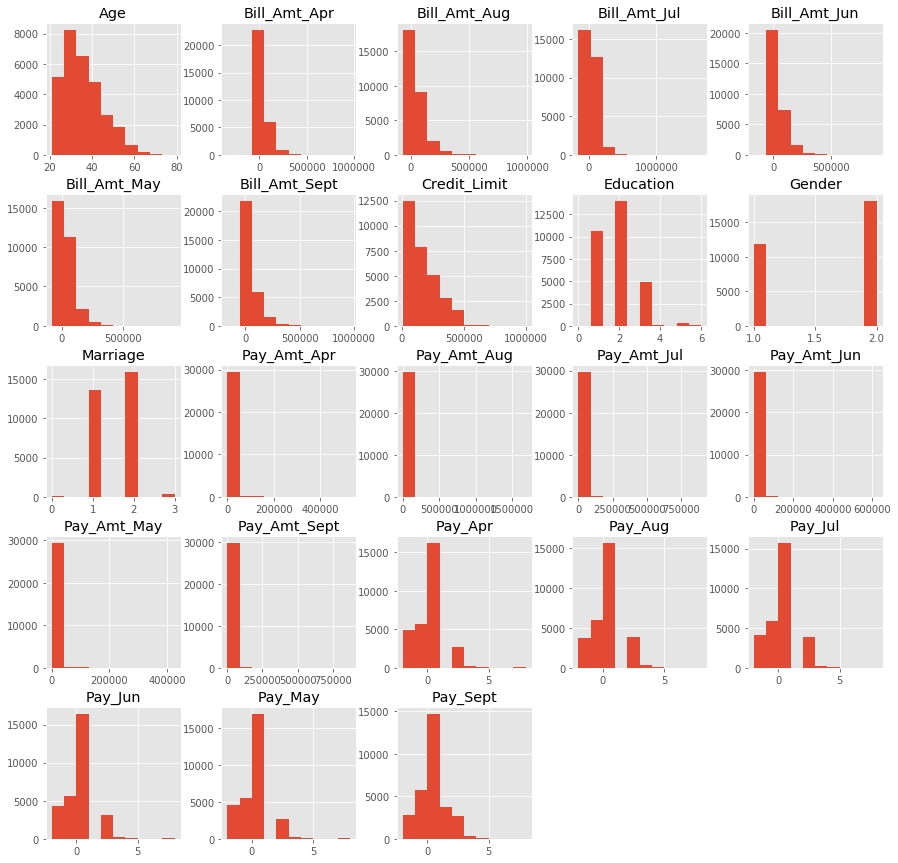

In [8]:
pd.DataFrame.hist(df, figsize = [15,15])

We can see that some fields seem to be skewed, by how much can be hard to do visually see so we will use a numerical value to make it clearer

In [9]:
#chekc the skew of the data numerically
df.skew()

Credit_Limit      0.992867
Gender           -0.424183
Education         0.970972
Marriage         -0.018742
Age               0.732246
Pay_Sept          0.731975
Pay_Aug           0.790565
Pay_Jul           0.840682
Pay_Jun           0.999629
Pay_May           1.008197
Pay_Apr           0.948029
Bill_Amt_Sept     2.663861
Bill_Amt_Aug      2.705221
Bill_Amt_Jul      3.087830
Bill_Amt_Jun      2.821965
Bill_Amt_May      2.876380
Bill_Amt_Apr      2.846645
Pay_Amt_Sept     14.668365
Pay_Amt_Aug      30.453817
Pay_Amt_Jul      17.216637
Pay_Amt_Jun      12.904985
Pay_Amt_May      11.127418
Pay_Amt_Apr      10.640728
dtype: float32

we also want to do some descriptive statistics on our data


In [10]:
df.describe()

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.328125,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.335938,49179.078125,4.701315e+04,43262.949219,40311.398438,38871.761719,5663.580566,5.921164e+03,5225.681641,4826.076660,4799.387695,5215.502441
std,129747.664062,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.859375,71173.773438,6.934938e+04,64332.855469,60797.156250,59554.105469,16563.281250,2.304087e+04,17606.960938,15666.160156,15278.305664,17777.466797
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.000000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


We will want to scale and transform our continous fields. We copy these to a new dataframe so we don't impact our categorical variables

In [11]:
#scale our continous fields
columns = ['Bill_Amt_Apr', 'Bill_Amt_May', 'Bill_Amt_Jun', 'Bill_Amt_Jul', 'Bill_Amt_Aug', 'Bill_Amt_Sept', 
           'Pay_Amt_Apr', 'Pay_Amt_May', 'Pay_Amt_Jun', 'Pay_Amt_Jul', 'Pay_Amt_Aug', 'Pay_Amt_Sept', 'Credit_Limit']
#Copy our target variables to their own df
df_cont = df[columns].copy()

In [12]:
df_cont.describe()

,Bill_Amt_Apr,Bill_Amt_May,Bill_Amt_Jun,Bill_Amt_Jul,Bill_Amt_Aug,Bill_Amt_Sept,Pay_Amt_Apr,Pay_Amt_May,Pay_Amt_Jun,Pay_Amt_Jul,Pay_Amt_Aug,Pay_Amt_Sept,Credit_Limit
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000
mean,38871.761719,40311.398438,43262.949219,4.701315e+04,49179.078125,51223.335938,5215.502441,4799.387695,4826.076660,5225.681641,5.921164e+03,5663.580566,167484.328125
std,59554.105469,60797.156250,64332.855469,6.934938e+04,71173.773438,73635.859375,17777.466797,15278.305664,15666.160156,17606.960938,2.304087e+04,16563.281250,129747.664062
min,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,10000.000000
25%,1256.000000,1763.000000,2326.750000,2.666250e+03,2984.750000,3558.750000,117.750000,252.500000,296.000000,390.000000,8.330000e+02,1000.000000,50000.000000
50%,17071.000000,18104.500000,19052.000000,2.008850e+04,21200.000000,22381.500000,1500.000000,1500.000000,1500.000000,1800.000000,2.009000e+03,2100.000000,140000.000000
75%,49198.250000,50190.500000,54506.000000,6.016475e+04,64006.250000,67091.000000,4000.000000,4031.500000,4013.250000,4505.000000,5.000000e+03,5006.000000,240000.000000
max,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000,621000.000000,896040.000000,1.684259e+06,873552.000000,1000000.000000


First thing we do is handle outliers, on all of our continous columns. We move all the data to be within 3 std dev of the mean. 

In [13]:
for col in df_cont.columns:
    u_bound = df_cont[col].mean() + 3* df_cont[col].std()
    l_bound = df_cont[col].mean() - 3* df_cont[col].std()
    df_cont[col][df_cont[col] > u_bound] = u_bound
    df_cont[col][df_cont[col] < l_bound] = l_bound

Here we normalize our data to remove the skewness. We Use Sckitlearns `normalize` function

In [14]:
df_cont = pd.DataFrame(preprocessing.normalize(df_cont,norm='l2'),columns = df_cont.columns)

Here we use `MinMaxScaler` to scale all of oour data so it is between `[0,1]`

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
df_cont = pd.DataFrame(min_max_scaler.fit_transform(df_cont),columns = df_cont.columns)
df_cont.describe()

,Bill_Amt_Apr,Bill_Amt_May,Bill_Amt_Jun,Bill_Amt_Jul,Bill_Amt_Aug,Bill_Amt_Sept,Pay_Amt_Apr,Pay_Amt_May,Pay_Amt_Jun,Pay_Amt_Jul,Pay_Amt_Aug,Pay_Amt_Sept,Credit_Limit
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.601537,0.504683,0.505009,0.514289,0.607340,0.453959,0.024512,0.031479,0.021446,0.037042,0.028139,0.040936,0.717491
std,0.108089,0.151407,0.138508,0.130442,0.125209,0.150665,0.054947,0.064773,0.046273,0.072342,0.052213,0.071282,0.257287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.489340,0.342528,0.353232,0.368765,0.467441,0.288252,0.000701,0.002065,0.001700,0.004362,0.004695,0.007383,0.452511
50%,0.587263,0.496277,0.507195,0.527013,0.622936,0.471154,0.011778,0.016465,0.010962,0.019938,0.015932,0.024855,0.753552
75%,0.705026,0.651900,0.642195,0.639755,0.720390,0.583245,0.020662,0.027965,0.018384,0.034360,0.027365,0.041317,0.990693
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We check our skew again and see that everything is pretty good, except our Pay_Amt columns so we have to do more work on them. 

In [16]:
df_cont.skew()

Bill_Amt_Apr     0.286253
Bill_Amt_May     0.194101
Bill_Amt_Jun     0.097933
Bill_Amt_Jul     0.045494
Bill_Amt_Aug     0.056848
Bill_Amt_Sept    0.147939
Pay_Amt_Apr      6.352565
Pay_Amt_May      5.773940
Pay_Amt_Jun      6.216822
Pay_Amt_Jul      5.389730
Pay_Amt_Aug      5.430341
Pay_Amt_Sept     5.245291
Credit_Limit    -0.223653
dtype: float64

Things look pretty solid so far, except our Pay Columns, we have to do more work on them. 

We do a log transform on them because they are heavily skewed right. We have to add .001 becasue  the minimum values after our scale is 0-1 abd you cant take a log of a zero number, so we add a small constant to our data.

In [17]:
pay_cols = ['Pay_Amt_Apr', 'Pay_Amt_May', 'Pay_Amt_Jun', 'Pay_Amt_Jul', 'Pay_Amt_Aug', 'Pay_Amt_Sept']
for col in pay_cols:
     df_cont[col]=np.log(df_cont[col]+.001)

In [18]:
df_cont.describe()

,Bill_Amt_Apr,Bill_Amt_May,Bill_Amt_Jun,Bill_Amt_Jul,Bill_Amt_Aug,Bill_Amt_Sept,Pay_Amt_Apr,Pay_Amt_May,Pay_Amt_Jun,Pay_Amt_Jul,Pay_Amt_Aug,Pay_Amt_Sept,Credit_Limit
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.601537,0.504683,0.505009,0.514289,0.607340,0.453959,-4.728709,-4.482627,-4.758389,-4.292417,-4.424372,-4.097680,0.717491
std,0.108089,0.151407,0.138508,0.130442,0.125209,0.150665,1.517422,1.587223,1.435602,1.599654,1.464739,1.581011,0.257287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,0.000000
25%,0.489340,0.342528,0.353232,0.368765,0.467441,0.288252,-6.376790,-5.787750,-5.914576,-5.228485,-5.168238,-4.781497,0.452511
50%,0.587263,0.496277,0.507195,0.527013,0.622936,0.471154,-4.360029,-4.047566,-4.426023,-3.866194,-4.078533,-3.655239,0.753552
75%,0.705026,0.651900,0.642195,0.639755,0.720390,0.583245,-3.832218,-3.541673,-3.943307,-3.342167,-3.562602,-3.162577,0.990693
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,1.000000


In [19]:
df_cont.skew()

Bill_Amt_Apr     0.286253
Bill_Amt_May     0.194101
Bill_Amt_Jun     0.097933
Bill_Amt_Jul     0.045494
Bill_Amt_Aug     0.056848
Bill_Amt_Sept    0.147939
Pay_Amt_Apr     -0.066022
Pay_Amt_May     -0.259804
Pay_Amt_Jun     -0.093302
Pay_Amt_Jul     -0.396947
Pay_Amt_Aug     -0.403713
Pay_Amt_Sept    -0.605244
Credit_Limit    -0.223653
dtype: float64

The skewed data seems to be fixed! we can add it back to our original dataframe

In [20]:
df_cont.reset_index(drop=True, inplace=True)
for col in df_cont:
    df[col] = df_cont[col]
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,0.966639,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.427917,0.563231,0.382885,0.340914,0.331753,0.483883,-6.907755,-3.283791,-6.907755,-6.907755,-6.907755,-6.907755
1,0.997843,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.289122,0.465084,0.374149,0.365243,0.360856,0.503343,-6.907755,-4.596339,-4.210555,-4.629304,-6.907755,-3.871921
2,0.890033,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512713,0.555786,0.463252,0.468793,0.482860,0.595237,-3.688285,-4.053542,-4.039466,-4.464142,-4.086092,-2.805789
3,0.412655,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626620,0.772687,0.711441,0.572092,0.599614,0.677498,-3.508197,-3.856121,-3.951053,-4.458219,-4.106865,-4.432810
4,0.584695,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.358657,0.505135,0.704492,0.571480,0.570576,0.652941,-3.217822,-0.703835,-1.580269,-2.139025,-4.237959,-4.513181


### Feature Selection Phase

Here we look to reduce the dimensionality of our data. We use RFE and Correlation analysis to select features. We run both to test and see if they both reccomend similar variables, so we know which ones are actually strong. 

In [21]:
#here we use RFE to select 8 features that our data will feature. Pass in the two dataframes as well as how many freatures you want it to select
rfe_cols = bk.rfe_select(df, df_target, 8)

[ 1  6 15  4 16  1  1 11 14  8  3  1  1  1  9  1  2 12  7  5  1 10 13]
Credit_Limit
Pay_Sept
Pay_Aug
Bill_Amt_Sept
Bill_Amt_Aug
Bill_Amt_Jul
Bill_Amt_May
Pay_Amt_Jun


In [22]:
#make a df from that list of values
df_RFE = df[rfe_cols].copy()
df_RFE.head(1)

,Credit_Limit,Pay_Sept,Pay_Aug,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_May,Pay_Amt_Jun
0,0.966639,2.0,2.0,0.427917,0.563231,0.382885,0.331753,-6.907755


Here we try Correlation

In [23]:
#here we just do standard correlation on the features. In this method, in order to sort the values, we lose the +/- nature of the correlation values.
#if you want to see the raw values, set "True" to "False"
bk.correlate(df, df_target, 8, "True")

Pay_Sept        0.324794
Pay_Aug         0.263551
Pay_Jul         0.235253
Pay_Jun         0.216614
Pay_May         0.204149
Pay_Apr         0.186866
Pay_Amt_Sept    0.119914
Name: Default, dtype: float64


In [24]:
df_corr = df[['Pay_Apr','Pay_May', 'Pay_Jun', 'Pay_Jul', 'Pay_Aug', 'Pay_Sept', 'Credit_Limit', 'Bill_Amt_Apr']].copy()
df_corr.head(1)

,Pay_Apr,Pay_May,Pay_Jun,Pay_Jul,Pay_Aug,Pay_Sept,Credit_Limit,Bill_Amt_Apr
0,-2.0,-2.0,-1.0,-1.0,2.0,2.0,0.966639,0.483883


Lastly We Try PCA

In [25]:
#we chose to run our PCA model on the variables that we chose from our correlation because it gave us the best results
pca = PCA(n_components=4)
principalComponents1 = pca.fit_transform(df_corr)
principalDf = pd.DataFrame(data = principalComponents1
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
principalDf.head()
sum(pca.explained_variance_ratio_)

0.9386913129983627

In [26]:
principalDf.head()

,PC1,PC2,PC3,PC4
0,-0.533230,-3.717563,-0.368732,-0.477259
1,1.731314,0.839689,0.398320,-2.440335
2,0.444842,0.201478,0.001188,-0.040823
3,0.474803,0.198315,-0.002257,-0.054215
4,-0.310000,0.930262,0.056075,-0.481139


### First Iteration Of testing Our Feature Selection

We want to just run and test the performance of the features that we have selected so far and see how the models perform

First we run a logisitic regression model on all of our features. 

In [27]:
df.head()
#somehow this is getting added back to our dataframe so we have to drop it again
df = df.drop(['Default'], axis=1)

In [28]:
bk.make_model(df,df_target)

[[3644 1066]
 [ 502  788]]
Accuracy: 0.7386666666666667
Precision: 0.4250269687162891
Recall: 0.6108527131782946


Next we make a model from our Correlation results

In [29]:
bk.make_model(df_corr,df_target)

[[3636 1074]
 [ 541  749]]
Accuracy: 0.7308333333333333
Precision: 0.4108612177729018
Recall: 0.5806201550387597


Here we try the features that our RFE selection gave us

In [30]:
#makes a df with the features we want, then runs the regression model on it
bk.make_model(df_RFE,df_target)

[[3723  987]
 [ 527  763]]
Accuracy: 0.7476666666666667
Precision: 0.436
Recall: 0.5914728682170542


Lastly, we run the model using our PCA model

In [31]:
#makes a df with the features we want, then runs the regression model on it
bk.make_model(principalDf,df_target)

[[3998  712]
 [ 576  714]]
Accuracy: 0.7853333333333333
Precision: 0.5007012622720898
Recall: 0.5534883720930233


## Bagging Ensamble

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df,df_target, test_size= 0.20, random_state=2019)
oversample = pd.concat([X_train,y_train],axis=1)
max_size = oversample['Default'].value_counts().max()
lst = [oversample]
    
for class_index, group in oversample.groupby('Default'):
    lst.append(group.sample(max_size-len(group), replace=True))
X_train = pd.concat(lst)
y_train=pd.DataFrame.copy(X_train['Default'])
del X_train['Default']

In [103]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state = 2019)  
mlp.fit(X_train, y_train.values.ravel())  

y_pred = mlp.predict(X_test) 

In [125]:
mlp = MLPClassifier(hidden_layer_sizes=(10,5, 2), max_iter=1000, random_state = 2019)  
mlp.fit(X_train, y_train.values.ravel())  

y_pred = mlp.predict(X_test) 

In [126]:
predictions.shape

(6000,)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[3760  950]
 [ 492  798]]
             precision    recall  f1-score   support

          0       0.88      0.80      0.84      4710
          1       0.46      0.62      0.53      1290

avg / total       0.79      0.76      0.77      6000



Confusion matrix, without normalization
[[3760  950]
 [ 492  798]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.38 0.62]]


/opt/tljh/user/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


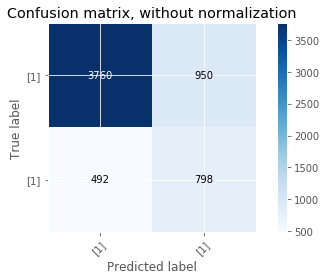

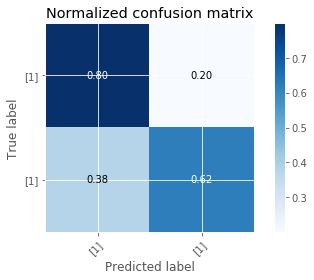

In [128]:
from sklearn.utils.multiclass import unique_labels
class_names = df_target.values
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [139]:
mlp = MLPClassifier(hidden_layer_sizes=(11,5, 2), max_iter=2000, random_state = 2019)  
mlp.fit(X_train, y_train.values.ravel())  

y_pred = mlp.predict(X_test) 

Confusion matrix, without normalization
[[3634 1076]
 [ 477  813]]
Normalized confusion matrix
[[0.77 0.23]
 [0.37 0.63]]


/opt/tljh/user/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


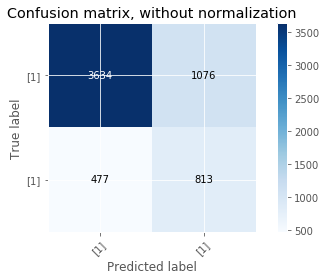

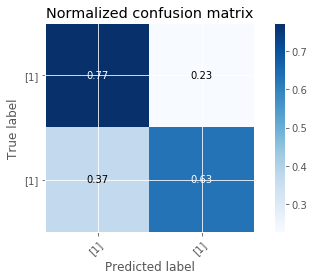

In [140]:
from sklearn.utils.multiclass import unique_labels
class_names = df_target.values
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [141]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[3634 1076]
 [ 477  813]]
             precision    recall  f1-score   support

          0       0.88      0.77      0.82      4710
          1       0.43      0.63      0.51      1290

avg / total       0.79      0.74      0.76      6000



In [ ]:
[[3760  950]
 [ 492  798]]

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = {'max_iter': [1000], 'hidden_layer_sizes':[3,4,5,6,7,8,9,10,11,12], 'random_state':[2019]}
clf_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [56]:
clf_grid.fit(X_train, y_train.values.ravel()) 

print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)

-----------------Original Features--------------------
Best score: 0.7006
Using the following parameters:
{'hidden_layer_sizes': 11, 'max_iter': 1000, 'random_state': 2019}
